### Tensorflow Application
Neural networks (single layer)

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:
$$ f = c \times 1.8 + 32 $$

It is a linear equation, and if we give several sample Celsius values (0, 7, 15, 22, 30, 37, 50, 56), we will have their corresponding Fahrenheit values:

In [5]:
c = np.array([-10, 0, 7, 15, 22, 30, 37, 45, 50, 56])
def trans(c):
    return 1.8 * c + 32

f = trans(c)
f

array([ 14. ,  32. ,  44.6,  59. ,  71.6,  86. ,  98.6, 113. , 122. ,
       132.8])

Therefore,

In [6]:
cel = np.array([-10, 0, 7, 15, 22, 30, 37, 45, 50, 56], dtype = float)
fah = np.array([14. ,  32. ,  44.6,  59. ,  71.6,  86. ,  98.6, 113. , 122. , 132.8], dtype = float)

for i, ch in enumerate(cel):
    print('{} degrees Celsius = {} degrees Fahrenheit'.format(ch, fah[i]))

-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
7.0 degrees Celsius = 44.6 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 71.6 degrees Fahrenheit
30.0 degrees Celsius = 86.0 degrees Fahrenheit
37.0 degrees Celsius = 98.6 degrees Fahrenheit
45.0 degrees Celsius = 113.0 degrees Fahrenheit
50.0 degrees Celsius = 122.0 degrees Fahrenheit
56.0 degrees Celsius = 132.8 degrees Fahrenheit


#### Model
Bulid a layer

In [7]:
L = tf.keras.layers.Dense(units = 1, input_shape = [1])
md = tf.keras.Sequential([L])

Compile

In [8]:
md.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

In [11]:
history = md.fit(cel, fah, epochs = 500, verbose = False)

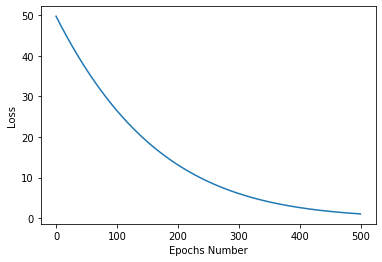

In [13]:
plt.xlabel('Epochs Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.show()

In [14]:
print(md.predict([100.0]))
print()
print(100 * 1.8 + 32)

[[214.13525]]

212.0


In [15]:
print('Layer variables: {}'.format(L.get_weights()))

Layer variables: [array([[1.8370513]], dtype=float32), array([30.430138], dtype=float32)]


See what happens if more layers added

In [16]:
l0 = tf.keras.layers.Dense(units = 4, input_shape=[1])  
l1 = tf.keras.layers.Dense(units = 4)
l2 = tf.keras.layers.Dense(units = 1)

In [17]:
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

In [18]:
model.fit(cel, fah, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


In [20]:
print(model.predict([100.0]))
print()
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print()
print("These are the l0 variables: {}".format(l0.get_weights()))
print()
print("These are the l1 variables: {}".format(l1.get_weights()))

[[212.]]

Model predicts that 100 degrees Celsius is: [[212.]] degrees Fahrenheit

These are the l0 variables: [array([[ 0.0678059 ,  0.80825037, -0.03938409, -0.40411124]],
      dtype=float32), array([-2.393457 ,  4.1098847,  3.0218163, -3.8742316], dtype=float32)]

These are the l1 variables: [array([[ 0.23563014, -0.2840252 , -0.6102679 ,  0.80308396],
       [ 0.98958135,  1.1628568 , -0.10822053, -0.1444563 ],
       [-0.0774582 ,  0.74643004,  1.0272686 ,  0.07910588],
       [-0.00657866, -0.5519344 , -1.0789133 ,  0.6201299 ]],
      dtype=float32), array([-0.73684156,  3.570752  ,  4.337703  , -0.8585809 ], dtype=float32)]


See that the result is accurate according to the formula, but added layers hides the simple form of the conversion equation.

In [4]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
tf.enable_eager_execution()

Import Clothing MNIST dataset

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

W0731 22:16:02.639364 4569195968 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [6]:
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print()
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000

Number of test examples: 10000


Preprocess the data

In [8]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    
    return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

Explore the preprocessed data

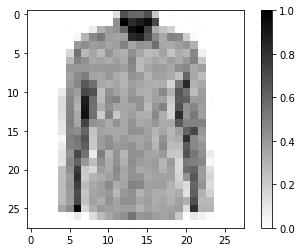

In [9]:
for image, label in test_dataset.take(1):
    break

image = image.numpy().reshape((28,28))


plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

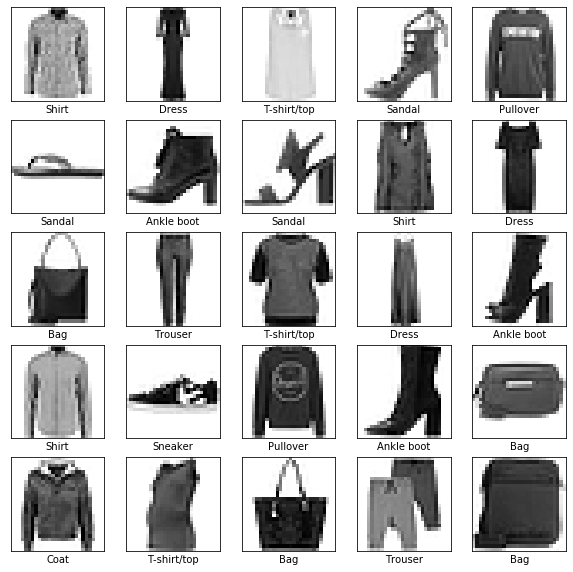

In [12]:
plt.figure(figsize=(10,10))

i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(names[label])
    i += 1

plt.show()

#### Model
Setup (Build) layers

In [13]:
l0 = tf.keras.layers.Flatten(input_shape = (28, 28, 1))
l1 = tf.keras.layers.Dense(128, activation = tf.nn.relu)
l2 = tf.keras.layers.Dense(10,  activation = tf.nn.softmax)

In [14]:
model = tf.keras.Sequential([l0, l1, l2])

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

training

In [16]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
import math

In [19]:
model.fit(train_dataset, epochs = 5, steps_per_epoch = math.ceil(num_train_examples / BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4949 - acc: 0.8257
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3669 - acc: 0.8672
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3391 - acc: 0.8776
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3122 - acc: 0.8856
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2940 - acc: 0.8919


Evaluate accuracy

In [20]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples / 32))
print()
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3560 - acc: 0.8730

Accuracy on test dataset: 0.873


Predictions

In [21]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [22]:
predictions.shape

(32, 10)

In [23]:
predictions[0]

array([1.4336301e-05, 6.1952953e-08, 2.7640006e-03, 6.9061666e-06,
       8.3502181e-02, 7.7682449e-07, 9.1370702e-01, 2.4992173e-09,
       4.6304917e-06, 2.6827354e-10], dtype=float32)

In [24]:
np.argmax(predictions[0])

6

In [25]:
test_labels[0]

6

In [29]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img[...,0], cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(names[predicted_label], 100*np.max(predictions_array), names[true_label]), color=color)


In [30]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

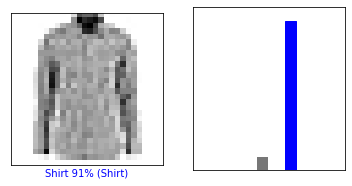

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

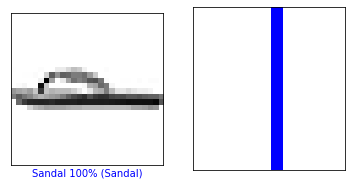

In [32]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

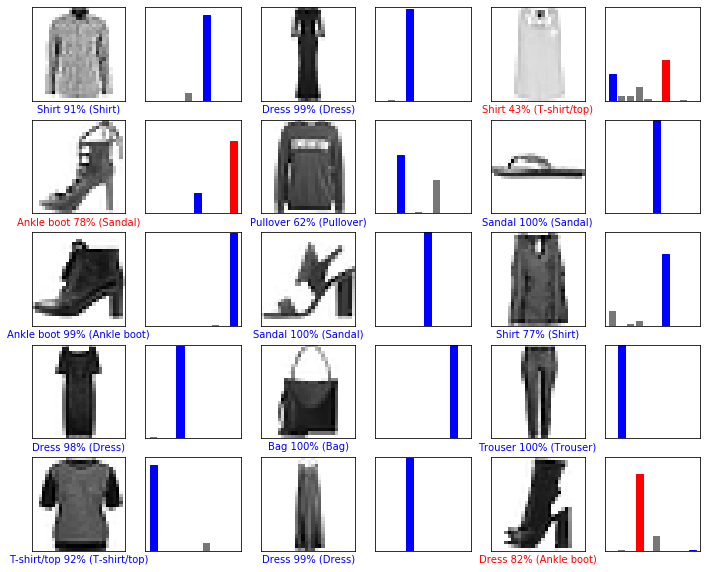

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

Predict for new images

In [34]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [35]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.4336289e-05 6.1952846e-08 2.7639982e-03 6.9061612e-06 8.3502106e-02
  7.7682233e-07 9.1370714e-01 2.4992128e-09 4.6304835e-06 2.6827257e-10]]


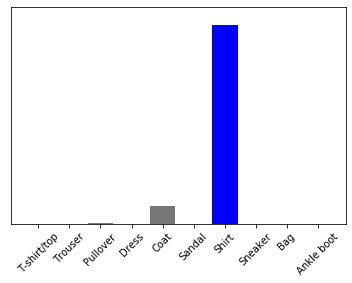

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), names, rotation = 45)

In [39]:
np.argmax(predictions_single[0])

6

#### CNN image classification

Model

Setup (Build) layers

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = tf.nn.relu,
                           input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10,  activation = tf.nn.softmax)
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Training

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [14]:
model.fit(train_dataset, epochs = 10, steps_per_epoch = math.ceil(num_train_examples / BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3950 - acc: 0.8592
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2544 - acc: 0.9081
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2111 - acc: 0.9226
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1831 - acc: 0.9316
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1575 - acc: 0.9413
Epoch 6/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1314 - acc: 0.9520
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1138 - acc: 0.9580
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0940 - acc: 0.9647
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0798 - acc: 0.9712
Epoch 10/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0681 - acc: 0.9750


In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples / 32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.2959 - acc: 0.9192
Accuracy on test dataset: 0.9192


In [17]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [18]:
predictions.shape

(32, 10)

In [19]:
predictions[0]

array([3.5252350e-07, 3.4339177e-11, 3.4872981e-04, 1.8038463e-09,
       5.2025374e-03, 9.5249808e-11, 9.9444795e-01, 5.8473693e-10,
       9.1929984e-09, 3.6234488e-07], dtype=float32)

In [20]:
np.argmax(predictions[0])

6

In [21]:
test_labels[0]

6

In [22]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img[...,0], cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(names[predicted_label], 100 * np.max(predictions_array), names[true_label]), color = color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

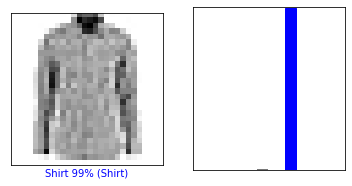

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

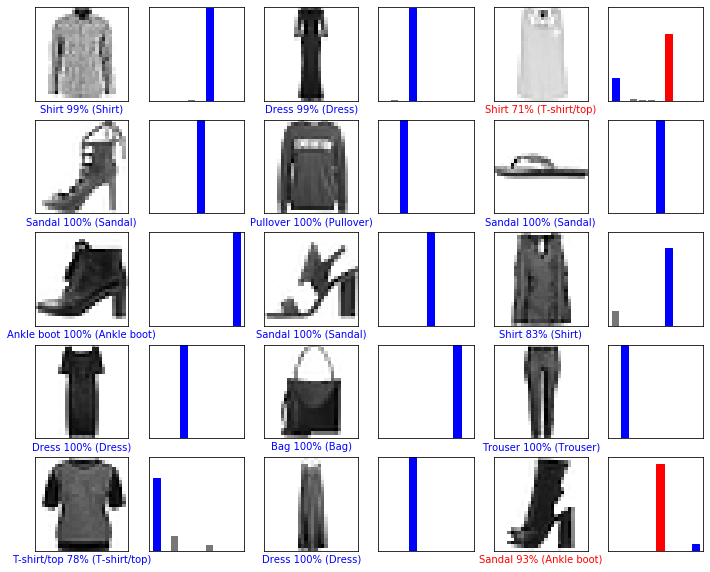

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [26]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [27]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.5252350e-07 3.4339309e-11 3.4873013e-04 1.8038463e-09 5.2025374e-03
  9.5250162e-11 9.9444795e-01 5.8473693e-10 9.1929984e-09 3.6234488e-07]]


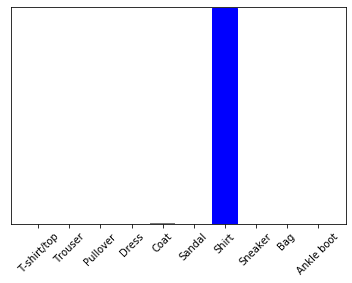

In [30]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

6